### G-Stations and G-Events Classes

In [1]:
from gnam.events.gevents import gevents as gevents
from gnam.model.bbox import bbox as bb
import pickle

f = open('./model_bbox.pickle', 'rb')
gf_bbox = pickle.load(f)
f.close()
print('bbox after pickle :\n',gf_bbox)

enorth = gevents(3.2)
print('enorth:\n',enorth)

ncat = enorth.getIncCatalog()
n0 = ncat[0]
evnt_lon = ncat[0].origins[0].longitude
evnt_lat = ncat[0].origins[0].latitude
print()
print('Event-0 lat,lon = %3.4f,%3.4f:\n' %(evnt_lat,evnt_lon))

bbox after pickle :
 {'c_loop': array([[ 245534.69164335,  565634.21781808],
       [ 226284.69164335,  598976.19586378],
       [ 251399.4283531 ,  613476.19586378],
       [ 270649.4283531 ,  580134.21781808],
       [ 245534.69164335,  565634.21781808]]), 'rotdeg': 30, 'origin': array([ 245534.69164335,  565634.21781808])}
enorth:
 2 Event(s) in Catalog:
2019-05-22T03:49:00.500000Z | +53.328,   +6.652 | 3.361468904 MLn | manual
2018-01-08T14:00:52.399999Z | +53.363,   +6.751 | 3.434692441 MLn | manual

Event-0 lat,lon = 53.3280,6.6520:



### PyProj Lat/Lon Conversions

In [2]:
from pyproj import Proj, transform

#lat = 53.283266 #picked form google maps just above Schildmeer
#lon = 6.813186  #picked form google maps just above Schildmeer
lat = evnt_lat
lon = evnt_lon

lat_lon_proj= Proj('epsg:4326')
nl_proj = Proj('epsg:28992')

x,y = transform(lat_lon_proj,nl_proj,lat,lon)
print(x,y)


239267.87032352312 594247.304372557


In [3]:
import shapefile as sf

mysf = sf.Reader('FieldShapeFile/Groningen_field')
print('mysf:',mysf)
print('mysf.shapes():',mysf.shapes())
s = mysf.shape(0)

mysf: shapefile Reader
    1 shapes (type 'POLYGON')
    1 records (15 fields)
mysf.shapes(): Shapes: [<shapefile.Shape object at 0x1076b9908>]


In [4]:
import numpy as np
import pandas as pd

# read file
df = pd.io.parsers.read_csv("Gloc.csv",sep=",",index_col=0)
print(df)
print()

# remove Lat and Lon and surf elevation
df = df.drop(columns=['Latitude [deg]', 'Longitude [deg]', 'Surface elevation [m]'])
print('Dropped Lat, Lon, Surf')
print(df)
print()

# remove receivers unless depth is 200 meters
df = df[df['Depth below surface [deg]'] > 100 ]
print('Remove Shallow')
print(df)
print()

# drop this column
df = df.drop(columns=['Depth below surface [deg]'])
print('Dropped Depth')
print(df[:10])
print()

#get rec_x
rec_x = df[['Rijksdriehoek X [m]']].to_numpy().astype(np.float32)
#reshape to vector of only one dim
rec_x = rec_x.reshape(rec_x.shape[0])
print()

#get rec_y
rec_y = df[['Rijksdriehoek Y [m]']].to_numpy().astype(np.float32)
#reshape to vector of only one dim
rec_y = rec_y.reshape(rec_y.shape[0])
print()

              Latitude [deg]  Longitude [deg]  Rijksdriehoek X [m]  \
Station name                                                         
G010                53.44253         6.731191             244304.6   
G011                53.44253         6.731191             244304.6   
G012                53.44253         6.731191             244304.6   
G013                53.44253         6.731191             244304.6   
G014                53.44253         6.731191             244304.6   
...                      ...              ...                  ...   
G760                53.35072         6.390067             221781.6   
G770                53.34029         6.330437             217826.2   
G780                53.36482         6.489397             228371.6   
G790                53.38356         6.331927             217862.1   
G800                53.41537         6.487625             228167.6   

              Rijksdriehoek Y [m]  Depth below surface [deg]  \
Station name             

[[ 244553.66791253  611725.20421346]
 [ 244547.0077105   611700.64330227]
 [ 244541.78889146  611680.00392532]
 ..., 
 [ 251194.37084925  611377.46280287]
 [ 251176.85301841  611369.94869857]
 [ 251154.70985694  611367.06276124]]


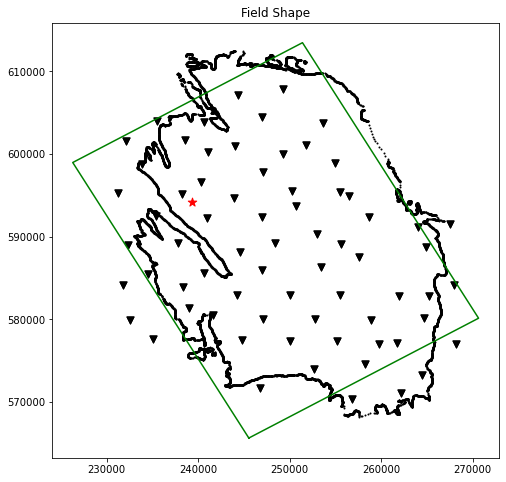

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

mypoints = np.asarray(s.points)
print(mypoints)

fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(x,y,s=80,c='red',marker='*',zorder=1)
ax.scatter(rec_x,rec_y,s=50,c='black',marker='v',zorder=1)
ax.scatter(mypoints[:,0],mypoints[:,1],s=1,c='black',zorder=2)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=3)
ax.set_title('Field Shape')
plt.show()

2
(2, 2)
{'0': (239267.87032352312, 594247.304372557), '1': (245789.47208218082, 598262.5766117715)}


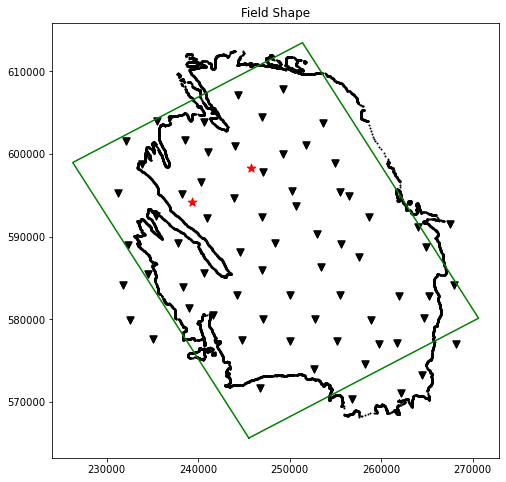

In [6]:
lat_lon_proj= Proj('epsg:4326')
nl_proj = Proj('epsg:28992')

print(len(ncat))

e_xy = np.zeros((len(ncat),2),dtype=np.float32)
e_dic = {}

for ie in range(len(ncat)):
    e_lon = ncat[ie].origins[0].longitude
    e_lat = ncat[ie].origins[0].latitude
    ex,ey = transform(lat_lon_proj,nl_proj,e_lat,e_lon)
    e_xy[ie,0] = ex
    e_xy[ie,1] = ey
    
    if str(ie) not in e_dic.keys():
        e_dic[str(ie)] = (ex,ey)
    

print(e_xy.shape)
print(e_dic)
    
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(e_xy[:,0],e_xy[:,1],s=80,c='red',marker='*',zorder=1)
ax.scatter(rec_x,rec_y,s=50,c='black',marker='v',zorder=1)
ax.scatter(mypoints[:,0],mypoints[:,1],s=1,c='black',zorder=2)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=3)
ax.set_title('Field Shape')
plt.show()
    

2
{'0': (239267.87032352312, 594247.304372557), '1': (245789.47208218082, 598262.5766117715)}


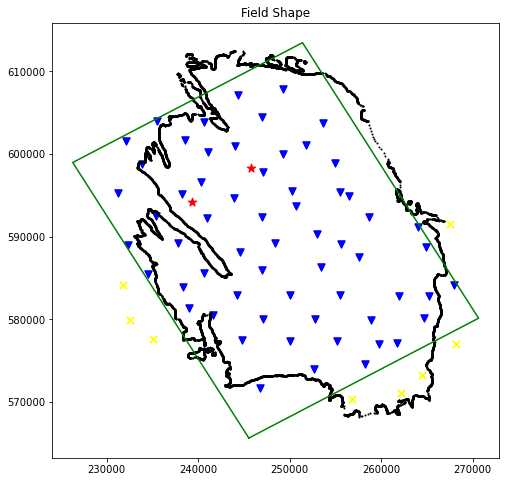

In [7]:
i_evnt, o_evnt = gf_bbox.separateByInOut(e_xy[:,0],e_xy[:,1])
i_recs, o_recs = gf_bbox.separateByInOut(rec_x,rec_y)

print(len(i_evnt))
print(e_dic)

fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(i_evnt[:,0],i_evnt[:,1],s=80,c='red',marker='*',zorder=1)
ax.scatter(o_recs[:,0],o_recs[:,1],s=50,c='yellow',marker='x',zorder=1)
ax.scatter(i_recs[:,0],i_recs[:,1],s=50,c='blue',marker='v',zorder=1)
ax.scatter(mypoints[:,0],mypoints[:,1],s=1,c='black',zorder=2)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=3)
ax.set_title('Field Shape')
plt.show()

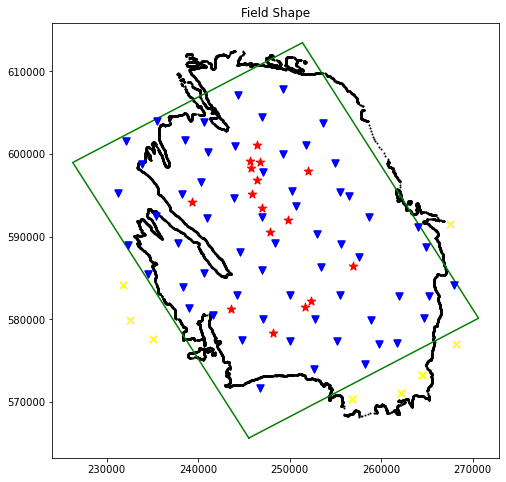

In [8]:
bb_enorth = gevents(2.0,gf_bbox)

i_bb_evnt = bb_enorth.getIncCoords()
o_bb_evnt = bb_enorth.getExcCoords()
all_bb_evnt = bb_enorth.getOrigCoords()

fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(i_bb_evnt[:,0],i_bb_evnt[:,1],s=80,c='red',marker='*',zorder=2)
#ax.scatter(o_bb_evnt[:,0],o_bb_evnt[:,1],s=80,c='yellow',marker='*',zorder=2)
#ax.scatter(all_bb_evnt[:,0],all_bb_evnt[:,1],s=80,c='yellow',marker='*',zorder=1)
ax.scatter(o_recs[:,0],o_recs[:,1],s=50,c='yellow',marker='x',zorder=2)
ax.scatter(i_recs[:,0],i_recs[:,1],s=50,c='blue',marker='v',zorder=2)
ax.scatter(mypoints[:,0],mypoints[:,1],s=1,c='black',zorder=0)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=0)
ax.set_title('Field Shape')
plt.show()
